<a href="https://colab.research.google.com/github/mounesi/pa/blob/master/notebooks/regressionAnalysisIrvingtonVillage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
cp drive/My\ Drive/data/pa/dataIrvingtonVillage/data_count_mv.csv ./data.csv

In [3]:
import pandas as pd
df = pd.read_csv('data.csv', index_col=0)
df['PCI'] = ['great' if (x > 8) else 'good' if (x > 6 and x <= 8) else 'fine' if (x > 4 and x <= 6) else 'poor' for x in df['Pavement Rate Overall']]
df['maintenance level'] = ['intact road' if (x > 8) else 'routine maintenance' if (x > 6 and x <= 8) else 'rehabilitation' if (x > 4 and x <= 6) else 'reconstruction' for x in df['Pavement Rate Overall']]

df.head()

,ROAD NAME,geo_loc,crack_count,machine_vision_prediction,LENGTH\n(FT),AVERAGE WIDTH (FT),AREA (SF),AREA (SY),Year RESURFACED,Pavement Rate Total,Pavement Rate Overall,Latitude,Longitude,coords,geometry,PCI,maintenance level
num,,,,,,,,,,,,,,,,,
I,AQUEDUCT LANE,"41.039262, -73.866576",1,8.143537,215.0,21.0,4515.0,501.67,1993.0,9.35,9.0,41.039262,-73.866576,"(-73.866576, 41.039262)",POINT (-73.86657599999999 41.039262),great,intact road
2,ARDSLEY AVE. EAST,"41.025517, -73.866235",12,2.710748,885.0,20.0,17700.0,1966.67,1994.0,4.50,5.0,41.025517,-73.866235,"(-73.866235, 41.025517)",POINT (-73.866235 41.025517),fine,rehabilitation
3,ARDSLEY AVE. WEST*,"41.025593, -73.872857",2,7.368577,2764.0,20.0,55280.0,6142.22,1992.0,6.80,7.0,41.025593,-73.872857,"(-73.872857, 41.025593)",POINT (-73.872857 41.025593),good,routine maintenance
4,BARBARA LANE*,"41.042897, -73.854404",2,7.368577,591.0,23.0,13593.0,1510.33,2009.0,8.30,8.0,41.042897,-73.854404,"(-73.854404, 41.042897)",POINT (-73.854404 41.042897),good,routine maintenance
5,BEECHWOOD LANE*,"41.027831, -73.865263",3,6.667364,1636.0,24.0,39264.0,4362.67,2001.0,8.30,8.0,41.027831,-73.865263,"(-73.865263, 41.027831)",POINT (-73.865263 41.027831),good,routine maintenance


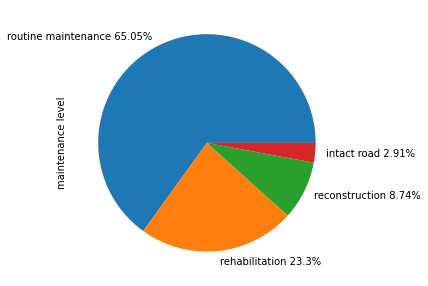

In [4]:
#df3 = df
#df3.set_index('PCI')
df3 = df['maintenance level'].value_counts()
df3['intact road']
coef = round(df3['intact road']/len(df['maintenance level']),4)*100
df3.rename(index = {'intact road': f'intact road {coef}%'}, inplace = True)
coef = round(df3['routine maintenance']/len(df['maintenance level']),4)*100
df3.rename(index = {'routine maintenance': f'routine maintenance {coef}%'}, inplace = True)
coef = round(df3['rehabilitation']/len(df['maintenance level']),4)*100
df3.rename(index = {'rehabilitation': f'rehabilitation {coef}%'}, inplace = True)
coef = round(df3['reconstruction']/len(df['maintenance level']),4)*100
df3.rename(index = {'reconstruction': f'reconstruction {coef}%'}, inplace = True)


plot = df3.plot.pie(y='Pavement Rate Overall', figsize=(5, 5))

In [5]:
df3 = df['maintenance level'].value_counts()

In [91]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(df['Pavement Rate Overall']) # Regression
#labels = np.array(df['PCI']) # classification
#df2= df[['Year RESURFACED']]
df2= df[['crack_count']]
#df2= df[['Year RESURFACED']]
df2.head()

,crack_count
num,
I,1
2,12
3,2
4,2
5,3


In [92]:
# Saving feature names for later use
feature_list = list(df2.columns)
# Convert to numpy array
df2 = np.array(df2)

In [93]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(df2, labels, test_size = 0.5, random_state = 42)

In [94]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (51, 1)
Training Labels Shape: (51,)
Testing Features Shape: (52, 1)
Testing Labels Shape: (52,)


#Regression

In [95]:
# Random Forest Regression

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'rate.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 1.35 rate.
Accuracy: 77.93 %.


In [96]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_features, train_labels)
predictions = lr.predict(test_features)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'rate.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 1.15 rate.
Accuracy: 80.63 %.


In [97]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(train_features, train_labels)

predictions = clf.predict(test_features)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'rate.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.92 rate.
Accuracy: 82.35 %.


In [98]:
#predictions = clf.predict(test_features)
predictions = clf.predict(df2)

In [99]:
#predictions

In [100]:
df.head()

,ROAD NAME,geo_loc,crack_count,machine_vision_prediction,LENGTH\n(FT),AVERAGE WIDTH (FT),AREA (SF),AREA (SY),Year RESURFACED,Pavement Rate Total,Pavement Rate Overall,Latitude,Longitude,coords,geometry,PCI,maintenance level
num,,,,,,,,,,,,,,,,,
I,AQUEDUCT LANE,"41.039262, -73.866576",1,8.143537,215.0,21.0,4515.0,501.67,1993.0,9.35,9.0,41.039262,-73.866576,"(-73.866576, 41.039262)",POINT (-73.86657599999999 41.039262),great,intact road
2,ARDSLEY AVE. EAST,"41.025517, -73.866235",12,2.710748,885.0,20.0,17700.0,1966.67,1994.0,4.50,5.0,41.025517,-73.866235,"(-73.866235, 41.025517)",POINT (-73.866235 41.025517),fine,rehabilitation
3,ARDSLEY AVE. WEST*,"41.025593, -73.872857",2,7.368577,2764.0,20.0,55280.0,6142.22,1992.0,6.80,7.0,41.025593,-73.872857,"(-73.872857, 41.025593)",POINT (-73.872857 41.025593),good,routine maintenance
4,BARBARA LANE*,"41.042897, -73.854404",2,7.368577,591.0,23.0,13593.0,1510.33,2009.0,8.30,8.0,41.042897,-73.854404,"(-73.854404, 41.042897)",POINT (-73.854404 41.042897),good,routine maintenance
5,BEECHWOOD LANE*,"41.027831, -73.865263",3,6.667364,1636.0,24.0,39264.0,4362.67,2001.0,8.30,8.0,41.027831,-73.865263,"(-73.865263, 41.027831)",POINT (-73.865263 41.027831),good,routine maintenance


In [101]:
# SGD Regression
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
reg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))

reg.fit(train_features, train_labels)

predictions = reg.predict(test_features)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'rate.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 1.18 rate.
Accuracy: 80.41 %.


In [66]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
clf = svm.SVC(random_state=0)
cross_val_score(clf, train_features, train_labels, cv=5, scoring='recall_macro')

[0.20833333 0.25       0.25       0.25       0.21666667]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [17]:
df_scores = pd.DataFrame()
df_scores['Random Forest Regression'] = 1.37, 77.24
df_scores['Linear Regression'] = 1.1, 81.31
df_scores['Logistic Regression'] = 0.92, 81.8
df_scores['SGD Regression'] = 1.13, 81.06
df_scores.rename(index = {0: 'Mean Absolute Error[rate]'}, inplace = True)
df_scores.rename(index = {1: 'Accuracy[%]'}, inplace = True)

#df_new = df.rename(columns={'A': 'a'}, index={'ONE': 'one'})
df_scores

,Random Forest Regression,Linear Regression,Logistic Regression,SGD Regression
Mean Absolute Error[rate],1.37,1.10,0.92,1.13
Accuracy[%],77.24,81.31,81.80,81.06


In [18]:
df_scores.to_csv('model rates')

In [45]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_features, train_labels)
predictions = lr.predict(test_features)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'rate.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 1.15 rate.
Accuracy: 80.63 %.


In [46]:
predictions

array([6.50620556, 6.53614369, 6.35274576, 6.56885907, 6.59820208,
       6.34857991, 6.44414717, 6.74987651, 6.65966535, 6.38427089,
       6.4748788 , 6.3834774 , 6.41004318, 6.81312514, 6.68821487,
       6.44414717, 6.4152009 , 6.75186025, 6.4144074 , 6.75324887,
       6.3834774 , 6.53852418, 6.47527555, 6.44573416, 6.65609462,
       6.3501669 , 6.53852418, 6.66065722, 6.4748788 , 6.56528834,
       6.63071908, 6.5678672 , 6.47309343, 6.90670866, 6.47686254,
       6.93585331, 6.47309343, 6.41420903, 6.93684518, 6.50223808,
       7.06036683, 6.53475508, 6.752257  , 6.38327902, 6.44097318,
       6.44256017, 6.56885907, 6.41182854, 6.47329181, 6.4423618 ,
       6.3826839 , 6.35175389])

In [47]:
labels

array([9., 5., 7., 8., 8., 5., 7., 7., 7., 8., 5., 5., 7., 7., 7., 8., 4.,
       7., 8., 7., 5., 8., 8., 7., 3., 3., 5., 5., 8., 8., 7., 4., 8., 7.,
       7., 7., 8., 7., 5., 7., 7., 5., 5., 8., 7., 7., 7., 7., 8., 7., 8.,
       6., 7., 6., 8., 8., 8., 7., 7., 7., 6., 6., 6., 5., 8., 8., 7., 8.,
       8., 8., 5., 8., 6., 7., 8., 7., 8., 8., 6., 4., 5., 7., 9., 6., 7.,
       8., 5., 4., 4., 4., 8., 7., 7., 7., 5., 7., 7., 7., 7., 3., 6., 9.,
       8.])

In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Year RESURFACED      Importance: 0.51
Variable: crack_count          Importance: 0.49


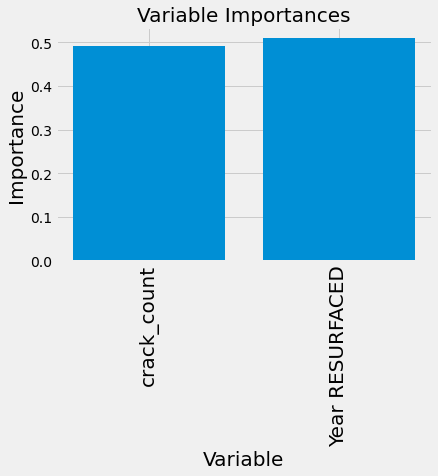

In [ ]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical', fontsize=20)
# Axis labels and title
plt.ylabel('Importance', fontsize=20); plt.xlabel('Variable', fontsize=20); plt.title('Variable Importances', fontsize=20);
#plt.xlabel('xlabel', fontsize=18)
#plt.ylabel('ylabel', fontsize=16)


In [ ]:

# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [ ]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('/content/small_tree.png');